# Homework 1: Food Safety 
## Cleaning and Exploring Data with Pandas
## Due Date: Thursday 9/13, 11:59 PM
## Course Policies

Here are some important course policies. These are also located at
http://www.ds100.org/fa18/.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

## This assignment
<img src="scoreCard.jpg" width=400>

In this homework, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health and we have made these data available to you via the DS 100 repository. The main goal for this assignment is to understand how restaurants are scored. We will walk through the various steps of exploratory data analysis to do this. We will provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

## Score breakdown
Question | Points
--- | ---
1a | 1
1b | 0
1c | 0
1d | 3
1e | 1
2a | 1
2b | 2
3a | 2
3b | 0
3c | 2
3d | 1
3e | 1
4a | 2
4b | 3
5a | 1
5b | 1
5c | 1
6a | 2
6b | 3
6c | 3
7a | 2
7b | 2
7c | 6
7d | 2
7e | 3
Total | 45

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In many of these assignments (and your future adventures as a data scientist) you will use `os`, `zipfile`, `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to include `%matplotlib inline` which enables [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. Add the line `sns.set()` to make your plots look nicer.

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt
assert 'seaborn'in sys.modules and sns

## Downloading the data

For this assignment, we need this data file: http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip

We could write a few lines of code that are built to download this specific data file, but it's a better idea to have a general function that we can reuse for all of our assignments. Since this class isn't really about the nuances of the Python file system libraries, we've provided a function for you in ds100_utils.py called `fetch_and_cache` that can download files from the internet.

This function has the following arguments:
- data_url: the web address to download
- file: the file in which to save the results
- data_dir: (default="data") the location to save the data
- force: if true the file is always re-downloaded 

The way this function works is that it checks to see if `data_dir/file` already exists. If it does not exist already or if `force=True`, the file at `data_url` is downloaded and placed at `data_dir/file`. The process of storing a data file for reuse later is called caching. If `data_dir/file` already and exists `force=False`, nothing is downloaded, and instead a message is printed letting you know the date of the cached file.

The function returns a `pathlib.Path` object representing the file. A `pathlib.Path` is an object that stores filepaths, e.g. `~/Dropbox/ds100/horses.txt`. 

The code below uses `ds100_utils.py` to download the data from the following URL: http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip

In [3]:
import ds100_utils
source_data_url = 'http://www.ds100.org/fa18/assets/datasets/hw2-SFBusinesses.zip'
target_file_name = 'data.zip'
data_dir = '.'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = ds100_utils.fetch_and_cache(data_url=source_data_url, data_dir=data_dir, file=target_file_name, force=False)

Using cached version that was downloaded (UTC): Thu Aug 16 16:37:00 2018


After running the code, if you look at the directory containing hw1.ipynb, you should see data.zip.

---
## 1: Loading Food Safety Data

Alright, great, now we have `data.zip`. We don't have any specific questions yet, so let's focus on understanding the structure of the data. Recall this involves answering questions such as 

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of the zip file. We could in theory do this by manually opening up the zip file on our computers or using a shell command like `!unzip`, but on this homework we're going to do almost everything in Python for maximum portability and automation.

**Goal**: Fill in the code below so that `my_zip` is a `Zipfile.zipfile` object corresponding to the downloaded zip file, and so that `list_names` contains a list of the names of all files inside the downloaded zip file.

Creating a `zipfile.Zipfile` object is a good start (the [Python docs](https://docs.python.org/3/library/zipfile.html) have further details). You might also look back at the code from the case study from lecture 2, [02-case-study.ipynb](http://www.ds100.org/fa18/assets/lectures/lec02/02-case-study.nbconvert.html). It's OK to copy and paste code from the 02-case-study file, though you might get more out of this exercise if you type out an answer.

### Question 1a: Looking Inside and Extracting the Zip Files

In [4]:
# Fill in the list_files variable with a list of all the names of the files in the zip file
my_zip = ...
list_names = ...

### BEGIN SOLUTION
my_zip = zipfile.ZipFile(dest_path, 'r')
list_names = [f.filename for f in my_zip.filelist]
print(list_names)
### END SOLUTION

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']


The cell below will test that your code is correct.

In [5]:
assert isinstance(my_zip, zipfile.ZipFile)
assert isinstance(list_names, list)
assert all([isinstance(file, str) for file in list_names]) 

### BEGIN HIDDEN TESTS
assert set(list_names) == set(['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv'])
### END HIDDEN TESTS

In your answer above, if you see something like `zipfile.ZipFile('data.zip'...`, we suggest changing it to read `zipfile.ZipFile(dest_path...` or alternately `zipfile.ZipFile(target_file_name...`. In general, we **strongly suggest having your filenames hard coded ONLY ONCE** in any given iPython notebook. It is very dangerous to hard code things twice, because if you change one but forget to change the other, you can end up with very hard to find bugs.

Now display the files' names and their sizes.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [6]:
### BEGIN SOLUTION
my_zip = zipfile.ZipFile(dest_path, 'r')
for file in my_zip.filelist:
    print('{}\t{}'.format(file.filename, file.file_size))
### END SOLUTION

violations.csv	3726206
businesses.csv	660231
inspections.csv	466106
legend.csv	120


Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this HW, the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for more deeply understanding what's going on. The cell below will unzip the csv files into a subdirectory called "data". Try running the code below.

In [7]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)

When you ran the code above, nothing gets printed. However, this code should have created a folder called "data", and in it should be the four CSV files. Assuming you're using Datahub, use your web browser to verify that these files were created, and try to open up `legend.csv` to see what's inside. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

### Question 1b: Programatically Looking Inside the Files

What we see when we opened the file above is good news! It looks like this file is indeed a csv file. Let's check the other three files. This time, rather than opening up the files manually, let's use Python to print out the first 5 lines of each. The `ds100_utils` library has a method called `head` that will allow you to retrieve the first N lines of a file as a list. For example `ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines of "data/legend.csv". Try using this function to print out the first 5 lines of all four files that we just extracted from the zipfile.

In [8]:
### BEGIN SOLUTION
data_dir = "./data/"
for f in list_names:
    print(ds100_utils.head(data_dir + f, 5), "\n")
### END SOLUTION

['"business_id","date","description"\n', '19,"20171211","Inadequate food safety knowledge or lack of certified food safety manager"\n', '19,"20171211","Unapproved or unmaintained equipment or utensils"\n', '19,"20160513","Unapproved or unmaintained equipment or utensils  [ date violation corrected: 12/11/2017 ]"\n', '19,"20160513","Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/11/2017 ]"\n'] 

['"business_id","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '19,"NRGIZE LIFESTYLE CAFE","1200 VAN NESS AVE, 3RD FLOOR","San Francisco","CA","94109","37.786848","-122.421547","+14157763262"\n', '24,"OMNI S.F. HOTEL - 2ND FLOOR PANTRY","500 CALIFORNIA ST, 2ND  FLOOR","San Francisco","CA","94104","37.792888","-122.403135","+14156779494"\n', '31,"NORMAN\'S ICE CREAM AND FREEZES","2801 LEAVENWORTH ST ","San Francisco","CA","94133","37.807155","-122.419004",""\n', '45,"CHARLIE\'S DELI CAFE","3202 FOLSOM ST ","San Francisco","CA"

### Question 1c: Reading in the Files

Based on the above information, let's attempt to load `businesses.csv`, `inspections.csv`, and `violations.csv` into pandas data frames with the following names: `bus`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. 

In [9]:
# path to directory containing data
dsDir = Path('data')

# Make sure to use these names
bus = ...
ins = ...
vio = ...


### BEGIN SOLUTION
bus = pd.read_csv(dsDir/'businesses.csv', encoding='ISO-8859-1')
ins = pd.read_csv(dsDir/'inspections.csv')
vio = pd.read_csv(dsDir/'violations.csv')
### END SOLUTION

Now that you've read in the files, let's try some `pd.DataFrame` methods.
Use the `DataFrame.head` command to show the top few lines of the `bus`, `ins`, and `vio` dataframes.

In [10]:
### BEGIN SOLUTION
bus.head()
### END SOLUTION

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [11]:
### BEGIN SOLUTION
bus.describe()
### END SOLUTION

,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


### Question 1d: Verify Your Files were Read Correctly

Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In [12]:
assert all(bus.columns == ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number'])
assert 6400 <= len(bus) <= 6420

assert all(ins.columns == ['business_id', 'score', 'date', 'type'])
assert 14210 <= len(ins) <= 14250

assert all(vio.columns == ['business_id', 'date', 'description'])
assert 39020 <= len(vio) <= 39080

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data. .

In [13]:
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


What we expect from your Inspections dataframe:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


What we expect from your Violations dataframe:


,business_id
min,19.0
50%,62060.0
max,94231.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

Do not delete the empty cell below!

In [14]:
### BEGIN HIDDEN TESTS
"""This is an internal use utility, put in a testing cell so instructors can use it here 
without it showing up in the student version.
"""

def df_summ(df, cols):
    """Return a summary of a dataframe in dict form suitable for input.
    """
    stats = ['min', '50%', 'max']
    return dict(data = df[cols].describe().loc[stats].to_dict(),
                index = stats, columns=cols)
### END HIDDEN TESTS    

In [15]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""

def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """
    import numpy.testing as npt
    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    npt.assert_allclose(act, des, rtol)

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing!

In [16]:
# These tests will raise an exception if your variables don't match numerically the correct
# answers in the main summary statistics shown above.
df_allclose(bus, bus_summary)
df_allclose(ins, ins_summary)
df_allclose(vio, vio_summary)

Do not edit the empty cell below. These are hidden tests!

In [17]:
### BEGIN HIDDEN TESTS
bus_sol = pd.read_csv(dsDir/'businesses.csv', encoding='ISO-8859-1')
ins_sol = pd.read_csv(dsDir/'inspections.csv')
vio_sol = pd.read_csv(dsDir/'violations.csv')


df_allclose(bus, bus_sol, ['business_id', 'latitude', 'longitude'])
df_allclose(ins, ins_sol, ['business_id', 'score'])
df_allclose(vio, vio_sol, ['business_id'])

# Let' disable these, too restrictive
#bus.equals(bus_sol)
#ins.equals(ins_sol)
#vio.equals(vio)
### END HIDDEN TESTS

### Question 1e: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.  

In [18]:
q1e_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q1e_answer = r"""

There appears to be a missing phone number for NORMAN'S ICE CREAM AND FREEZES.

"""
### END SOLUTION

print(q1e_answer)



There appears to be a missing phone number for NORMAN'S ICE CREAM AND FREEZES.




We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables indivdually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
## 2: Examining the Business data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2a

Examining the entries in `bus`, is the `business_id` unique for each record? Your code should compute the answer, i.e. don't just hard code "True".

Hint: use `value_counts()` or `unique()` to determine if the `business_id` series has any duplicates.

In [19]:
is_business_id_unique = ... # put your final answer True/False here

### BEGIN SOLUTION
is_business_id_unique = bus['business_id'].value_counts().max() == 1
### END SOLUTION

In [20]:
assert is_business_id_unique

### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. How many records are there?
1. What does each record represent (e.g., a store, a chain, a transaction)?  
1. What is the primary key?

Please write your answer in the `q2b_answer` variable. You may create new cells to run code as long as you don't delete the cell below.

In [21]:
# use this cell for scratch work
# consider using groupby or value_counts() on the 'name' or 'business_id' 
...


### BEGIN SOLUTION
print("Number of records:", len(bus))
print("Number of unique business ids:", len(bus['business_id'].unique()))
print("Most frequently occuring business names:", bus['name'].value_counts().idxmax())
print("A few samples of the business with most frequent name ----------")
bus[bus['name'] == bus['name'].value_counts().idxmax()].head(7)
### END SOLUTION

Number of records: 6406
Number of unique business ids: 6406
Most frequently occuring business names: STARBUCKS COFFEE
A few samples of the business with most frequent name ----------


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
9,66,STARBUCKS COFFEE,1800 IRVING ST,San Francisco,CA,94122,37.763578,-122.477461,+14152427970
236,1085,STARBUCKS COFFEE,333 MARKET ST,San Francisco,CA,94105,37.792037,-122.397852,+14152410256
238,1103,STARBUCKS COFFEE,4094 18TH ST,San Francisco,CA,94114,37.760938,-122.434692,+14152410256
240,1116,STARBUCKS COFFEE,1899 UNION ST,San Francisco,CA,94123,37.797713,-122.430336,+14159214049
241,1122,STARBUCKS COFFEE,2132 CHESTNUT ST,San Francisco,CA,94123,37.800547,-122.438494,+14156736781
244,1127,STARBUCKS COFFEE,555 CALIFORNIA ST,San Francisco,CA,94104,37.792773,-122.403567,+14159551940
272,1265,STARBUCKS COFFEE,744 IRVING ST,San Francisco,CA,94122,37.764088,-122.465981,+14158540888


In [22]:
q2b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q2b_answer = r"""

There are 6406 rows in `bus`, and each row has a unique `business_id` that 
serves as a primary key. This implies that each row represents a single business. 
If we then groupby name we see that there are many rows/records with the same name 
at different locations indicating that each record represents a store.

"""
### END SOLUTION

print(q2b_answer)



There are 6406 rows in `bus`, and each row has a unique `business_id` that 
serves as a primary key. This implies that each row represents a single business. 
If we then groupby name we see that there are many rows/records with the same name 
at different locations indicating that each record represents a store.




---
## 3: Zip code

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3a

What kind of values are in the `postal code` column in the `bus` data frame?  
1. Are zip codes quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. How are the zip code values encoded in python: ints, floats, strings, booleans ...?

To answer the second question you might want to examine a particular entry using the Python `type` command.

In [23]:
# Use this cell for your explorations.
q3a_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q3a_answer = r"""

The zip codes are largely nominal fields with little meaning to differences or ratios.  
While in some regions of the country similar numbers correspond to similar locations 
this is not a strict guarantee.

The zip codes are currently stored as strings.

"""
### END SOLUTION

print(q3a_answer)



The zip codes are largely nominal fields with little meaning to differences or ratios.  
While in some regions of the country similar numbers correspond to similar locations 
this is not a strict guarantee.

The zip codes are currently stored as strings.




### Question 3b

To explore the zip code values, it makes sense to examine counts, i.e., the number of records  that have the same zip code value. This is essentially answering the question: How many restaurants are in each zip code? 


In the cell below, create a series where the index is the postal code and the value is the number of businesses in that postal code. For example, in 94110 (hey that's my old zip code!), there should be 596 businesses. Your series should be in descending order, i.e. 94110 should be at the top. 

For this answer, use `groupby`, `size`, and `sort_values`.

In [24]:
zip_counts = ...

### BEGIN SOLUTION
zip_counts = bus.groupby("postal_code").size().sort_values(ascending=False)
### END SOLUTION

Unless you know pandas well already, your answer probably has one subtle flaw in it: it fails to take into account businesses with missing zip codes. Unfortunately, missing data is just a reality when we're working with real data.

There are a couple of ways to include null postal codes in the zip_counts series above. One approach is to use `fillna`, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, I picked "?????". When you run the code below, you should see that there are 240 businesses with missing zip code.

In [25]:
zip_counts = bus.fillna("?????").groupby("postal_code").size().sort_values(ascending=False)
zip_counts.head(15)

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
?????    240
94105    232
94108    228
94114    223
94117    204
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [26]:
bus["postal_code"].value_counts(dropna=False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

Missing zip codes aren't our only problem. There is also some bad data where the postal code got messed up, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting replacing the old values in the `postal_code` columnm, we'll instead create a new column called `postal_code_5`.

The reason we're making a new column is because it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [27]:
# Run me
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122
5,54,RHODA GOLDMAN PLAZA,2180 POST ST,San Francisco,CA,94115,37.784626,-122.437734,+14153455060,94115
6,56,CAFE X + O,1799 CHURCH ST,San Francisco,CA,94131,37.742325,-122.426476,+14158263535,94131
7,58,OASIS GRILL,91 DRUMM ST,San Francisco,CA,94111,37.794483,-122.396584,+14158341942,94111
8,61,CHOWDERS,PIER 39 SPACE A3,San Francisco,CA,94133,37.808240,-122.410189,+14153914737,94133
9,66,STARBUCKS COFFEE,1800 IRVING ST,San Francisco,CA,94122,37.763578,-122.477461,+14152427970,94122


### Question 3c : A Closer Look at Missing Zip Codes

Let's look more closely at businesses with missing zip codes. We'll see that many zip codes are missing for a good reason. Examine the businesses with missing zipcode values.  Pay attention to their addresses.  Do you notice anything interesting? You might need to look at a bunch of entries, i.e. don't just look at the first five.

*Hint: You can use the series `isnull` method to create a binary array, which can then be used to show only rows of the dataframe that contain null values.*

In [28]:
# Use this cell for your explorations.
q3c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q3c_answer = r"""

Many of the restuarants without zipcodes are "off the grid" indicating that they are moving restaurants.
Therefore a missing zipcode might actually make sense and dropping these from analysis could bias our conclusions.

"""
### END SOLUTION

print(q3c_answer)



Many of the restuarants without zipcodes are "off the grid" indicating that they are moving restaurants.
Therefore a missing zipcode might actually make sense and dropping these from analysis could bias our conclusions.




### Question 3d: Incorrect Zip Codes

This dataset is supposed to be only about San Francisco, so let's set up a list of all San Francisco zip codes.

In [29]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", "94109", "94110", "94111", "94112", "94114", "94115", "94116", "94117", "94118", "94119", "94120", "94121", "94122", "94123", "94124", "94125", "94126", "94127", "94128", "94129", "94130", "94131", "94132", "94133", "94134", "94137", "94139", "94140", "94141", "94142", "94143", "94144", "94145", "94146", "94147", "94151", "94158", "94159", "94160", "94161", "94163", "94164", "94172", "94177", "94188"]

Set `weird_zip_code_businesses` equal to a new dataframe showing only rows corresponding to zip codes that are not valid AND not NaN. Use the `postal_code_5` field.

*Hint: The `~` operator inverts a boolean array. Use in conjunction with `isin`.*

*Hint: The `notnull` method can be used to form a useful boolean array for this problem.*



In [30]:
weird_zip_code_businesses = ...

### BEGIN SOLUTION
weird_zip_code_businesses = bus[~bus['postal_code_5'].isin(all_sf_zip_codes) & bus['postal_code_5'].notnull()]
### END SOLUTION

In [31]:
weird_zip_code_businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


If we were doing very serious data analysis, we might indivdually look up every one of these strange records. Let's focus on just two of them: zip codes 94545 and 94602. Use a search engine to identify what cities these zip codes appear in. Try to explain why you think these two zip codes appear in your dataframe. For the one with zip code 94602, try searching for the business name and locate its real address.

In [32]:
# Use this cell for your explorations.
q3d_answer = r"""

Put your answer here, replacing this text. 

94545 - ...

94602 - ...

"""


### BEGIN SOLUTION HERE

bus.set_index('postal_code_5').loc[["94545", "94602"]]

q3d_answer = r"""

94545 - Hayward, look at record and see it's vending machine company with many locations 

94602 - Oakland, look at the record and see it's probably a typo and should be 94102
"""

### END SOLUTION HERE

print(q3d_answer)



94545 - Hayward, look at record and see it's vending machine company with many locations 

94602 - Oakland, look at the record and see it's probably a typo and should be 94102



### Question 3e

We often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

Let's correct 94602 to the more likely value based on your analysis.  Let's modify the derived field `zip_code` using `bus['zip_code'].str.replace` to replace 94602 with the correct value based on this business's real address that you learn by using a search engine.

In [33]:
# WARNING: Be careful when uncommenting the line below, it will set the entire column to NaN unless you 
# put something to the right of the ellipses.
# bus['postal_code_5'] = ... 

### BEGIN SOLUTION
# Replace the 94602 with 94102
bus['postal_code_5'] = bus['postal_code_5'].str.replace("94602", "94102")
### END SOLUTION

In [34]:
assert "94602" not in bus['postal_code_5']

---
## 4: Latitude and Longitude

Let's also consider latitude and longitude values and get a sense of how many are missing.

### Question 4a

How many businesses are missing longitude values?

*Hint: Use isnull.*

In [35]:
missing_latlongs = ...

### BEGIN SOLUTION
missing_latlongs = sum(bus['longitude'].isnull())
### END SOLUTION

Do not delete the empty cell below!

In [36]:
### BEGIN HIDDEN TESTS
assert missing_latlongs == sum(bus['longitude'].isnull())
### END HIDDEN TESTS

As a somewhat contrived exercise in data manipulation, let's try to identify which zip codes are missing the most longitude values.

Throughout problems 4a and 4b, let's focus on only the "dense" zip codes of the city of San Francisco, listed below as `sf_dense_zip`.

In [37]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
            "94109", "94110", "94111", "94112", "94114", "94115",
            "94116", "94117", "94118", "94121", "94122", "94123", 
            "94124", "94127", "94131", "94132", "94133", "94134"]

In the cell below, create a series where the index is `postal_code_5`, and the value is the number of businesses with missing longitudes in that zip code. Your series should be in descending order. Only businesses from `sf_dense_zip` should be included.

For example, 94110 should be at the top of the series, with the value 294.

*Hint: Start by making a new dataframe called `bus_sf` that only has businesses from `sf_dense_zip`.

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*

In [38]:
num_missing_in_each_zip = ...

### BEGIN SOLUTION
def count_null(s):
    return len(s[s.isnull()])

bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
num_missing_in_each_zip = bus_sf['longitude'].groupby(bus_sf["postal_code_5"]).agg(count_null).sort_values(ascending = False)
### END SOLUTION

Do not edit the empty cell below.

In [39]:
### BEGIN HIDDEN TESTS
def count_null_sol(s):
    return len(s[s.isnull()])

bus_sf_sol = bus[bus['postal_code_5'].isin(sf_dense_zip)]
num_missing_in_each_zip_sol = bus_sf_sol['longitude'].groupby(bus_sf_sol["postal_code_5"]).agg(count_null).sort_values(ascending=False)
assert num_missing_in_each_zip_sol.equals(num_missing_in_each_zip)
### END HIDDEN TESTS

### Question 4b

In question 4a, we counted the number of null values per zip code. Let's now count the proportion of null values.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `fraction_missing_df`. It should have an index called `postal_code_5` and should also have 3 columns:

1. `null count`: The number of missing values for the zip code.
2. `not null count`: The number of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

Your data frame should be sorted by the fraction null in descending order.

Recommended approach: Build three series with the appropriate names and data and then combine them into a dataframe. This will require some new syntax you may not have seen. You already have code from question 4a that computes the `null count` series.

To pursue this recommended approach, you might find these two functions useful:

* `rename`: Renames the values of a series.
* `pd.concat`: Can be used to combine a list of Series into a dataframe. Example: `pd.concat([s1, s2, s3], axis=1)` will combine series 1, 2, and 3 into a dataframe.

*Hint: You can use the divison operator to compute the ratio of two series.*

*Hint: The ~ operator can invert a binary array. Or alternately, the `notnull` method can be used to create a binary array from a series.*

*Note: An alternate approach is to create three aggregation functions as pass them in a list to the `agg` function.*

In [40]:
fraction_missing_df = ...

### BEGIN SOLUTION

def count_null(s):
    return len(s[s.isnull()])
def count_non_null(s):
    return len(s[~s.isnull()])
def fraction_null(s):
    n = len(s[s.isnull()])
    nn = len(s[~s.isnull()])
    return (n/(n+nn))
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
fraction_missing_df = bus_sf['longitude'].groupby(bus['postal_code_5']).agg([count_non_null, count_null, fraction_null])
fraction_missing_df.columns = ['count non null', 'count null', 'fraction null']
fraction_missing_df = fraction_missing_df.sort_values("fraction null", ascending=False)

### END SOLUTION

Do not edit the empty cell below.

In [41]:
### BEGIN HIDDEN TESTS
def sol_count_null(s):
    return len(s[s.isnull()])
def sol_count_non_null(s):
    return len(s[~s.isnull()])
def sol_fraction_null(s):
    n = len(s[s.isnull()])
    nn = len(s[~s.isnull()])
    return (n/(n+nn))
sol_bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
sol_fraction_missing_df = sol_bus_sf['longitude'].groupby(bus['postal_code_5']).agg([sol_count_non_null, sol_count_null, sol_fraction_null])
sol_fraction_missing_df.columns = ['count non null', 'count null', 'fraction null']
sol_fraction_missing_df = sol_fraction_missing_df.sort_values("fraction null", ascending=False)

assert fraction_missing_df[["count non null", "count null"]].equals(sol_fraction_missing_df[["count non null", "count null"]])
### END HIDDEN TESTS

## Summary of the Business Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are many errors with the zip codes. As a result, we may want to drop the records with zip codes outside of San Francisco or to treat them differently. For some of the bad values, we could take the time to look up the restaurant address online and fix these errors.   
* We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but could in principle be automated for business with well formed addresses. 

---
## 5: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [42]:
ins.head(5)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


### Question 5a
From calling `head`, we know that each row in this table corresponds to the inspection of a single business. Let's get a sense of the total number of inspections conducted, as well as the total number of unique businesses that occur in the dataset.

In [43]:
# The number of rows in ins
rows_in_table = ...

# The number of unique business IDs in ins.
unique_ins_ids = ...

### BEGIN SOLUTION
rows_in_table  = ins.shape[0]
unique_ins_ids = len(ins['business_id'].unique())
### END SOLUTION

Do not delete the empty cell below!

In [44]:
### BEGIN HIDDEN TESTS
assert rows_in_table  == ins.shape[0]
assert unique_ins_ids == len(ins['business_id'].unique())
### END HIDDEN TESTS

As you should have seen above, we have an average of roughly 3 inspections per business.

### Question 5b

Next, we examine the Series in the `ins` dataframe called `type`. From examining the first few rows of `ins`, we see that `type` is a string and one of its values is 'routine', presumably for a routine inspection. What values does `type` take on? How many occurrences of each value is in the DataFrame? What are the implications for further analysis? For this problem, you need only fill in the string with a description; there's no specific dataframe or series that you need to create.

In [45]:
q5b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
print(pd.value_counts(ins['type']))

q5b_answer = r"""

All the records have the same value, "routine", except for one. 
This variable will not be useful in any analysis because it provides no information.

"""
### END SOLUTION

print(q5b_answer)

routine      14221
complaint        1
Name: type, dtype: int64


All the records have the same value, "routine", except for one. 
This variable will not be useful in any analysis because it provides no information.




### Question 5c

In this question, we're going to try to figure out what years the data spans. Unfortunately, the dates in our file are formatted as strings such as `20160503`, which are a little tricky to interpret. The ideal solution for this problem is to modify our dates so that they are in an appropriate format for analysis. 

In the cell below, we attempt to add a new column to `ins` called `new_date` which contains the `date` stored as a datetime object. This calls the `pd.to_datetime` method, which converts a series of string representations of dates (and/or times) to a series containing a datetime object.

In [46]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,1970-01-01 00:00:00.020160513
1,19,94,20171211,routine,1970-01-01 00:00:00.020171211
2,24,98,20171101,routine,1970-01-01 00:00:00.020171101
3,24,98,20161005,routine,1970-01-01 00:00:00.020161005
4,24,96,20160311,routine,1970-01-01 00:00:00.020160311


As you'll see, the resulting `new_date` column doesn't make any sense. This is because the default behavior of the `to_datetime()` method does not properly process the passed string. We can fix this by telling `to_datetime` how to do its job by providing a format string.

In [47]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


This is still not ideal for our analysis, so we'll add one more column that is just equal to the year by using the `dt.year` property of the new series we just created.

In [48]:
ins['year'] = ins['new_date'].dt.year
ins.head(5)

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


Now that we have this handy `year` column, we can try to understand our data better.

What range of years is covered in this data set? Are there roughly the same number of inspections each year? Provide your answer in text only.

In [49]:
q5c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
print(pd.value_counts(ins['year']))

q5c_answer = r"""

Answer: No, 2018 only has a few. Also 2015 has substantially fewer inspections than 2016 or 2017.

"""
### END SOLUTION

print(q5c_answer)

2016    5443
2017    5166
2015    3305
2018     308
Name: year, dtype: int64


Answer: No, 2018 only has a few. Also 2015 has substantially fewer inspections than 2016 or 2017.




---
## 6: Explore inspection score

### Question 6a
Let's look at the distribution of scores. As we saw before when we called `head` on this data, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Find the counts of the number of inspections for each score. Specifically, create a series in `scoreCts` where the index is the score and the value is the number of times that score was given.

Then make a bar plot of these counts. It should look like the image below. It does not need to look exactly the same, but it should be fairly close.

<img src="hist.png" width=400>


<Container object of 47 artists>

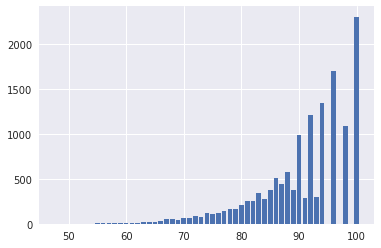

In [50]:
scoreCts = ...

### BEGIN SOLUTION
scoreCts = ins['score'].value_counts()
plt.bar(scoreCts.keys(), scoreCts)
### END SOLUTION

#plt.show()

### Question 6b

Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

In [51]:
q6b_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q6b_answer = r"""

The distribution is unimodal with a peak at 100. 
It is skewed left (as expected with a variable bounded on the right). 
The distribution has a long left tail with some restaurants receiving scores 
that are in the 50s, 60s, and 70s. One unusal feature of the distribution is the 
bumpiness with even numbers having higher counts than odd. This may be because
the violations result in penalties of 2, 4, 10, etc. points.

"""
### END SOLUTION

print(q6b_answer)



The distribution is unimodal with a peak at 100. 
It is skewed left (as expected with a variable bounded on the right). 
The distribution has a long left tail with some restaurants receiving scores 
that are in the 50s, 60s, and 70s. One unusal feature of the distribution is the 
bumpiness with even numbers having higher counts than odd. This may be because
the violations result in penalties of 2, 4, 10, etc. points.




### Question 6c

Let's figure out which restaurants had the worst scores ever. Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as NaN.

*Hint: Use the merge method to join the `ins` dataframe with the appropriate portion of the `bus` dataframe.*

In [52]:
ins_named = ...

### BEGIN SOLUTION
ins_named = ins.merge(bus[["business_id", "name", "address"]], how="left", left_on = "business_id", right_on = "business_id")
### END SOLUTION

Using this data frame, identify the restaurant with the lowest inspection scores ever. Optionally: head to yelp.com and look up the reviews page for this restaurant. Copy and paste anything interesting you want to share.

In [53]:
q6c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
q6c_answer = r"""

The restaurant with the worst score is D&A cafe. One review I found amusing was:

This place is awesome.

I don't care that they've been shut down for health violations multiple times.  

This place is always packed with regulars. I equate the cleanliness like if you were eating in Asia.  I've never had an issue.

The food is good and cheap. I come for the happy hour after 10pm, and take it togo.  Staff is usually pretty friendly. 

Deep fried pig intestines are on point and only $4.25.

Watermelon juice is insanely good and just over 2 bucks.

Salt and pepper wings are crispy and seasoned well.

I just got 3 dishes and a watermelon juice for $15. Hell yes.

If you want cheap Chinese food, this is the place.

"""
### END SOLUTION

print(q6c_answer)



The restaurant with the worst score is D&A cafe. One review I found amusing was:

This place is awesome.

I don't care that they've been shut down for health violations multiple times.  

This place is always packed with regulars. I equate the cleanliness like if you were eating in Asia.  I've never had an issue.

The food is good and cheap. I come for the happy hour after 10pm, and take it togo.  Staff is usually pretty friendly. 

Deep fried pig intestines are on point and only $4.25.

Watermelon juice is insanely good and just over 2 bucks.

Salt and pepper wings are crispy and seasoned well.

I just got 3 dishes and a watermelon juice for $15. Hell yes.

If you want cheap Chinese food, this is the place.




Just for fun you can also look up the restaurants with the best scores. You'll see that lots of them aren't restaurants at all!

---
## 7: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.

### Question 7a

Let's see which restaurant has had the most extreme change in their ratings. Let the "swing" of a restaurant be defined as the difference between its lowest and highest ever rating. If a restaurant has been reviewed fewer than two times, its swing is zero. Using whatever technique you want to use, identify the three restaurants that are tied for the maximum swing value.

In [54]:
q7a_answer = r"""

Put your answer here, replacing this text. Do not take into account the ### YOUR CODE HERE below

"""

### BEGIN SOLUTION
def swing(s):
    return max(s) - min(s)

swing_series = ins_named['score'].groupby(ins_named['business_id']).agg(swing).rename('swing')
bus_swing = pd.concat([bus.set_index('business_id'), swing_series], axis=1).sort_values("swing", ascending=False)
q7a_answer = r"""

JOANIE'S DINER INC. 

THE CREW

NEW GARDEN RESTAURANT, INC.
"""
### END SOLUTION

print(q7a_answer)



JOANIE'S DINER INC. 

THE CREW

NEW GARDEN RESTAURANT, INC.



### Question 7b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named `count` that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `business_id`, and the second should be on `year`.

An example row in this dataframe might look tell you that business_id is 573, year is 2017, and count is 4.

*Hint: Use groupby to group based on both the `business_id` and the `year`.*

*Hint: Use rename to change the name of the column to `count`.*

In [55]:
inspections_by_id_and_year = ...

### BEGIN SOLUTION
inspections_by_id_and_year = ins.groupby([ins['business_id'], ins['year']]).size().sort_values(ascending=False).rename("count").to_frame()
### END SOLUTION

Do not edit the empty cell below!

In [56]:
### BEGIN HIDDEN TESTS
inspections_by_id_and_year_sol = ins.groupby([ins['business_id'], ins['year']]).size().sort_values(ascending=False).rename("count").to_frame()

assert inspections_by_id_and_year_sol.equals(inspections_by_id_and_year)
### END HIDDEN TESTS

You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [57]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

### Question 7c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2016 for this problem.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows of the resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

The scatter plot shoud look like this:

<img src="scat.png" width=400>
*Note: Each score pair must be a list type; numpy arrays will not pass the autograder.*

*Hint: Use the `filter` method from lecture 3 to create a new dataframe that only contains restaurants that received exactly 2 inspections.*

*Hint: Our answer is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.*

In [58]:
scores_pairs_by_business = ...

# For some odd reason, we can't just pass `list` into `.agg` so we define this function:
# You may or may not use it

ins2016 = ins[ins['year'] == 2016]

def group_to_list(group):
    return list(group)

### BEGIN SOLUTION
# SOLUTION 1
scores_pairs_by_business = (ins2016.sort_values('date')
                            .loc[:, ['business_id', 'score']]
                            .groupby('business_id')
                            .filter(lambda group: len(group)==2)
                            .groupby('business_id')
                            .agg(group_to_list)
                            .rename(columns={'score':'score_pair'}))


# SOLUTION 2
scores_pairs_by_business = (ins2016.sort_values('date')
                            .groupby('business_id')
                            .filter(lambda group: len(group)==2)
                            .groupby('business_id')
                            .agg({'score': lambda group: group.tolist()})
                            .rename(columns={'score':'score_pair'}))
scores_pairs_by_business.head()
### END SOLUTION

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"


In [59]:
assert isinstance(scores_pairs_by_business, pd.DataFrame)
assert scores_pairs_by_business.columns == ['score_pair']
### BEGIN HIDDEN TESTS
# SOLUTION 1
ins2016 = ins[ins['year'] == 2016]

scores_pairs_by_business_sol_1 = (ins2016.sort_values('date')
                            .loc[:, ['business_id', 'score']]
                            .groupby('business_id')
                            .filter(lambda group: len(group) == 2)
                            .groupby('business_id')
                            .agg(group_to_list)
                            .rename(columns={'score':'score_pair'}))


# SOLUTION 2
scores_pairs_by_business_sol_2 = (ins2016.sort_values('date')
                            .groupby('business_id')
                            .filter(lambda group: len(group) == 2)
                            .groupby('business_id')
                            .agg({'score': lambda group: group.tolist()})
                            .rename(columns={'score':'score_pair'}))

# Sort by index for comparison
scores_pairs_by_business_sol_1.sort_index(inplace=True)
scores_pairs_by_business_sol_2.sort_index(inplace=True)
scores_pairs_by_business.sort_index(inplace=True)


assert scores_pairs_by_business_sol_1.equals(scores_pairs_by_business) or \
    scores_pairs_by_business_sol_2.equals(scores_pairs_by_business)
### END HIDDEN TESTS

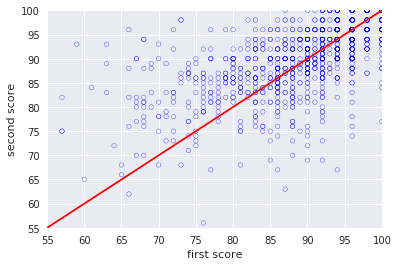

In [60]:
# Create scatter plot here.

### BEGIN SOLUTION
first_score, second_score = zip(*scores_pairs_by_business['score_pair'])
plt.scatter(first_score,second_score,s=20,facecolors='none',edgecolors='b')
plt.plot([55,100],[55,100],'r-')
plt.xlabel('first score')
plt.ylabel('second score')
plt.axis([55,100,55,100]);
### END SOLUTION

### Question 7d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

<img src="hist_2.png" width=400>

*Hint: Use `second_score` and `first_score` created in the scatter plot code above.*

*Hint: Convert the scores into numpy arrays to make them easier to deal with.*

*Hint: Try changing the number of bins when you call plt.hist.*

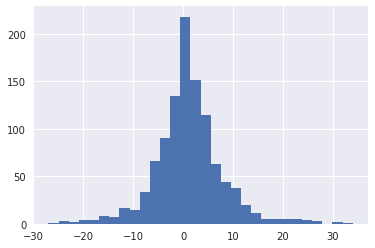

In [61]:
# Create histogram here
### BEGIN SOLUTION
diffs = np.array(second_score) - np.array(first_score)
plt.hist(diffs,bins=30);
### END SOLUTION

### Question 7e

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 7c? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 7d? What do you see?

In [62]:
q7c_answer = r"""

Put your answer here, replacing this text. Do not take into account the ###YOUR CODE HERE below.

"""

### BEGIN SOLUTION
q7c_answer = r"""

If the restaurants tend to improve from the first to the second inspection, 
we would expect to see the points in the scatter plot fall above the line of slope 1. 
We would also expet to see the histogram of the difference in scores to be shifted toward
positive values. Interestingly, we don't see this. The second inspection often is worse than first. 
The histogram of differences shows a unimodal distribution with a peak below 0. 
This distribution has long tails with some scores being as low as -20 and others as high as 20-30.

"""
### END SOLUTION

print(q7c_answer)



If the restaurants tend to improve from the first to the second inspection, 
we would expect to see the points in the scatter plot fall above the line of slope 1. 
We would also expet to see the histogram of the difference in scores to be shifted toward
positive values. Interestingly, we don't see this. The second inspection often is worse than first. 
The histogram of differences shows a unimodal distribution with a peak below 0. 
This distribution has long tails with some scores being as low as -20 and others as high as 20-30.




## Summary of the Inspections Data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that many restaurants have more than one inspection a year. 
* By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
* We identified the restaurants that have had the largest swing in rating over time.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 


## Congrats !

Congrats! You are finished with HW1.